In [1]:
import numpy as np
import utils as ut
from matplotlib import pyplot as plt
import scipy

In [2]:
np.random.seed(999)

In [3]:
data = scipy.io.loadmat(f'./data/Cr2_4000.mat')
E = data['E']
Et = ut.lam2lamt(E, E[0] - 0.2 , E[-1] + 0.2)
phi = ut.generate_phi(0.2, len(Et))

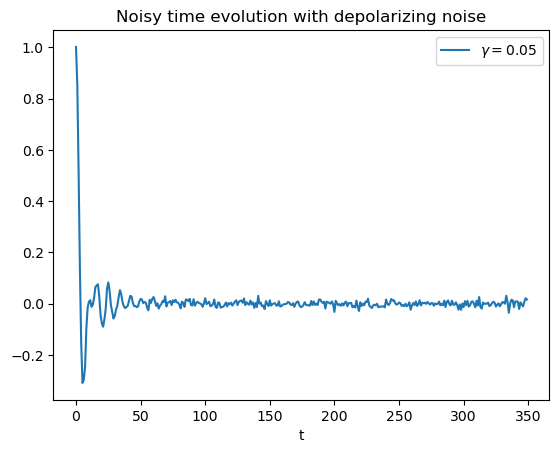

In [4]:
gammas = [0.05]
Tmax = 350
noise = 0.01
for gamma in gammas:
    dataS = ut.generate_samples_depolarizing(Et, phi, gamma, dt=1.0, nb=Tmax) + noise * np.random.randn(Tmax) + 1j * noise * np.random.randn(Tmax)
    plt.plot(dataS.real, label=fr'$\gamma = {gamma}$')
plt.title('Noisy time evolution with depolarizing noise')
plt.xlabel('t')
plt.legend()

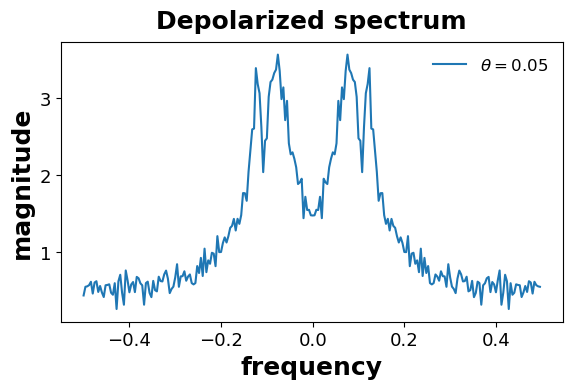

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

for gamma in gammas:
    # Generate the depolarizing sample with noise
    dataS = ut.generate_samples_depolarizing(Et, phi, gamma, dt=1.0, nb=Tmax) \
            + noise * np.random.randn(Tmax) + 1j * noise * np.random.randn(Tmax)
    x = dataS

    # Compute a truncated time-domain FFT
    X_fft = scipy.fft.fft(x[:250].real)
    X_fft_shifted = scipy.fft.fftshift(X_fft)
    frequencies = scipy.fft.fftshift(scipy.fft.fftfreq(len(x[:250]), d=1))
    
    # Plot the magnitude spectrum for this gamma value
    ax.plot(frequencies, np.abs(X_fft_shifted), linestyle='-', marker='',
            label=fr'$\theta = {gamma}$')


ax.set_title("Depolarized spectrum", fontsize=18, fontweight='bold', pad=10)
ax.set_xlabel("frequency", fontsize=18, fontweight='bold')
ax.set_ylabel("magnitude", fontsize=18, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(frameon=False, loc='upper right', fontsize=12)

plt.tight_layout()
#plt.savefig('./figures/depolarizing_noise_spectrum_theta=0.05_styled.pdf', bbox_inches='tight')
plt.show()

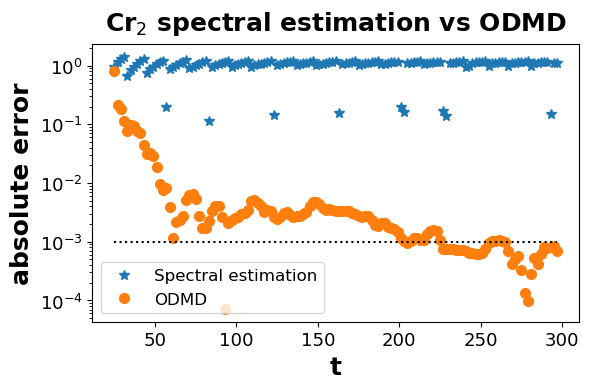

In [6]:
# Compute the errors of spectral estimation
errors = []
time = np.arange(25, Tmax, 2)
for i in range(25, Tmax, 2):
    est = ut.specest(x[:i].real, 0, 1.0)
    pred = ut.lamt2lam(est, E[0] - 0.2, E[-1] + 0.2)
    errors.append(np.abs(pred - E[0]))
    x = dataS
    X_fft = scipy.fft.fft(x[:].real)
    X_fft_shifted = scipy.fft.fftshift(X_fft)
    frequencies = scipy.fft.fftshift(scipy.fft.fftfreq(len(x), d=1))

# Create figure
fig, ax = plt.subplots(figsize=(6, 4))

# Plot spectral estimation error using markers
ax.semilogy(time[:137], errors[:137],
            marker='*', linestyle='',
            markersize=7, label='Spectral estimation')

# Load baseline ODMD data
data = np.load('./figures/figsdata/Cr2_baseline_odmd_noise=0.01_Tmax=350_overlap=0.2_dt=1.0_real)_depolarized_gamma=0.05_ODMD.npy')
# Plot ODMD error using markers
ax.semilogy(time[:137], data[0, :137],
            marker='o', linestyle='',
            markersize=7, label='ODMD')

# Chemical accuracy
ax.plot([time[0], time[136]], [1e-3, 1e-3], 'k:')


ax.set_xlabel('t', fontsize=18, fontweight='bold')
ax.set_ylabel('absolute error', fontsize=18, fontweight='bold')
ax.set_title('Cr$_2$ spectral estimation vs ODMD', fontsize=18, fontweight='bold', pad=10)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(frameon=True, loc='lower left', fontsize=12)

plt.tight_layout()
#plt.savefig('./figures/cr2_spec_est_vs_ODMD_depolarizing_noise_theta=0.05_Tmax=300_styled.pdf', bbox_inches='tight')
plt.show()

In [7]:
data = np.load('./figures/figsdata/Cr2_baseline_odmd_noise=0.01_Tmax=350_overlap=0.2_dt=1.0_real)_depolarized_gamma=0.05_eigenvalues.npy')

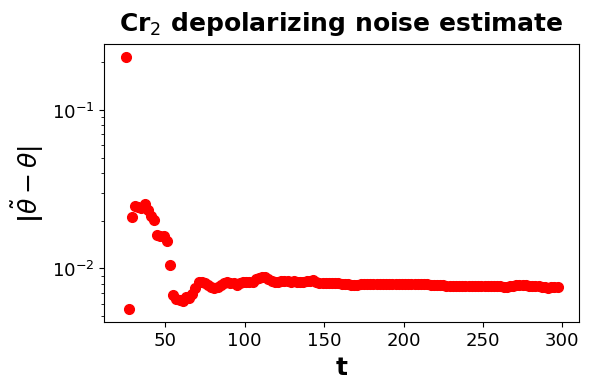

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.semilogy(time[:137], np.abs(0.05 - np.real(data[:137, 0, 0])),
            marker='o', linestyle='', color='red',
            markersize=7)


ax.set_xlabel('t', fontsize=18, fontweight='bold')
ax.set_ylabel(r'|$\tilde{\theta} - \theta|$', fontsize=18, fontweight='bold')
ax.set_title(r'Cr$_2$ depolarizing noise estimate', fontsize=18, fontweight='bold', pad=10)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
#plt.savefig('./figures/depolarizing_noise_estimate_Cr2_baseline_odmd_noise=0.01_Tmax=350_overlap=0.2_dt=1.0_real_depolarized_gamma=0.05.pdf')
plt.show()

/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


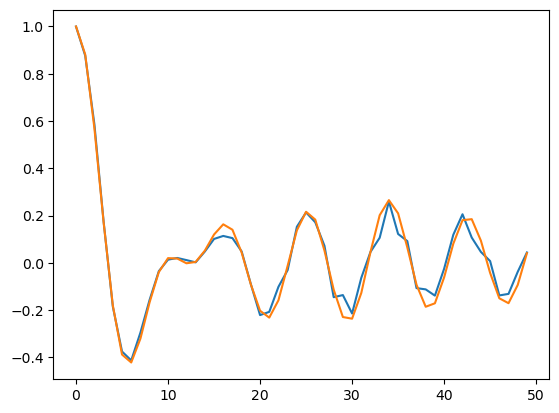

In [9]:
dataS_true=np.load('./data/noiseless_dataS_Cr2_noise=0.01_Tmax=1500_overlap=0.2_dt=1.0_ff=0.2_left_right.npy')
plt.plot((dataS * np.exp(data[137,0,0].real * np.arange(Tmax)))[:50] )
plt.plot(dataS_true.real[:50])